# FraudDataset

## Outline




**Step 1: Initial Data Exploration**

1. Start by loading and examining the dataset.
Check the first few rows to understand the data structure and types.
Get summary statistics (e.g., mean, median, standard deviation) for numerical features.
Examine unique values and counts for categorical features.

2. Check for class imbalance in the 'Fraudulent Flag' column.

Potential Insights:

2. Get an overview of the dataset and its contents.
Identify any immediate issues like missing values or data types that need conversion.
Understand the distribution of fraudulent and non-fraudulent transactions.



**Step 2: Data Cleaning**

1. Handle any missing values if discovered during exploration.
Convert data types as needed (e.g., convert 'Transaction Date and Time' to datetime).
Remove duplicates if present.

Potential Insights:

Ensure data quality and consistency.
Prepare the data for further analysis.




**Step 3: Univariate Analysis**

1. Create histograms, box plots, or bar charts to visualize the distribution of numerical features.

2. Use bar charts for categorical features to understand their distribution.

**Numerical Features:**

Create histograms, box plots, or bar charts for 'Transaction Amount', 'User Age', 'User's Transaction History', 'User's Credit Score', 'Location Distance', 'Time Taken for Transaction', 'Merchant's Reputation Score', and 'Merchant's Business Age'.


**Categorical Features:**

Create bar charts for 'Payment Method', 'Country Code', 'Transaction Type', 'Device Type', 'Browser Type', 'Operating System', 'Merchant Category', 'User Gender', 'User Account Status', 'Transaction Status', 'Transaction Time of Day', 'Transaction Currency', 'Transaction Purpose', 'User's Email Domain', and 'Transaction Authentication Method'.

Potential Insights:

Identify outliers or anomalies in numerical features.
Understand the distribution of categorical features.




**Step 4: Bivariate Analysis**

1. Explore relationships between numerical features and the target variable ('Fraudulent Flag') using scatter plots or box plots.
Analyze categorical features in relation to the target variable using bar charts or stacked bar charts.

Potential Insights:

Identify numerical features that show significant differences between fraudulent and non-fraudulent transactions.
Explore categorical features to see if they are predictive of fraud.

**Numerical Features vs. Target:**

Use scatter plots or box plots to analyze relationships between the 'Fraudulent Flag' and numerical features.
Categorical Features vs. Target:
Create bar charts or stacked bar charts to analyze relationships between the 'Fraudulent Flag' and categorical features


**Step 5: Feature Engineering**

1. Create new features if they can potentially provide valuable information. For example, you can calculate transaction frequency for each user or merchant.

2. Encode categorical features using techniques like one-hot encoding or label encoding.

Potential Insights:

Feature engineering can improve the predictive power of myodel.
Look for relationships between newly created features and fraud detection.



**Step 6: Multivariate Analysis**

1. Perform correlation analysis between numerical features ('Transaction Amount', 'User Age', etc.) to identify any strong correlations.
Visualize correlations using a pair plot or heatmap.
**Potential Insights:**

Identify multicollinearity (high correlation) between features, which can impact model performance.




**Step 7: Visualizing Temporal Patterns**

1. Analyze temporal patterns using 'Transaction Date and Time':

2. Plot time-related features over time, e.g., daily transaction volume.

3. Consider aggregating data over different time intervals (e.g., hourly, daily) to identify patterns.

Potential Insights:

Detect any time-dependent trends in fraudulent transactions.



**Step 8: Model Building and Evaluation**

1. Split the dataset into training and testing sets.
Build and train a predictive model for fraud detection (e.g., logistic regression, random forest, XGBoost).
Evaluate the model using appropriate metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
Consider using techniques like cross-validation for robust evaluation.

Potential Insights:

Assess the model's performance in detecting fraudulent transactions.
Identify which features are most important for prediction.



**Step 9: Interpretability and Explainability**

1. Utilize model interpretability techniques (e.g., SHAP values, feature importance plots) to explain model predictions.
Potential Insights:

Understand why the model classifies certain transactions as fraudulent.

**Step 10: Fine-Tuning and Deployment**

1. If necessary, fine-tune the model hyperparameters to optimize performance.
Once satisfied with the model's performance, deploy it for real-time or batch fraud detection.

Potential Insights:

Continuously monitor model performance and retrain as needed.

# Setup

## Using Pyspark

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=6386def16f5ac8129aa281264afc68b6866c241d2cf08bb16b2a54be9c4205a7
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


## Using Pandas

In [2]:
# Setup

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize Spark session
# spark = SparkSession.builder.appName("FraudDetectionDataset").getOrCreate()

# import and mount g-drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# define the file path
file_path = '/content/drive/My Drive/Data_for_Google_Colab/FraudDetectionDataset.csv'

# load the CSV file into a PySpark DataFrame
# df = spark.read.csv(file_path, header=True, inferSchema=True)

# display the first few rows of the DataFrame
# df.show(5)

# read dataset using pandas
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,...,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,...,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,...,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,...,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,...,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


## Pyspark

In [ ]:
from pyspark.sql.functions import corr

# create list for numerical columns
num_cols = ['Transaction Amount', 'User Age', "User's Transaction History", "User's Credit Score",
'Location Distance', 'Time Taken for Transaction', "Merchant's Reputation Score", "Merchant's Business Age"]

# Calculate correlations for numerical columns
corr_matrix = df.select([corr(c1, c2).alias(f"corr_{c1}_{c2}")
                         for c1 in num_cols
                         for c2 in num_cols if c1 != c2])

# Show the correlation matrix
corr_matrix.show()


+--------------------------------+--------------------------------------------------+-------------------------------------------+-----------------------------------------+--------------------------------------------------+---------------------------------------------------+-----------------------------------------------+--------------------------------+----------------------------------------+---------------------------------+-------------------------------+----------------------------------------+-----------------------------------------+-------------------------------------+--------------------------------------------------+----------------------------------------+---------------------------------------------------+-------------------------------------------------+----------------------------------------------------------+-----------------------------------------------------------+-------------------------------------------------------+-------------------------------------------+----

In [ ]:
# Convert the correlation matrix to a Pandas DataFrame
corr_df = corr_matrix.toPandas()
corr_df.head()

,corr_Transaction Amount_User Age,corr_Transaction Amount_User's Transaction History,corr_Transaction Amount_User's Credit Score,corr_Transaction Amount_Location Distance,corr_Transaction Amount_Time Taken for Transaction,corr_Transaction Amount_Merchant's Reputation Score,corr_Transaction Amount_Merchant's Business Age,corr_User Age_Transaction Amount,corr_User Age_User's Transaction History,corr_User Age_User's Credit Score,...,corr_Merchant's Reputation Score_Location Distance,corr_Merchant's Reputation Score_Time Taken for Transaction,corr_Merchant's Reputation Score_Merchant's Business Age,corr_Merchant's Business Age_Transaction Amount,corr_Merchant's Business Age_User Age,corr_Merchant's Business Age_User's Transaction History,corr_Merchant's Business Age_User's Credit Score,corr_Merchant's Business Age_Location Distance,corr_Merchant's Business Age_Time Taken for Transaction,corr_Merchant's Business Age_Merchant's Reputation Score
0,0.000097,-0.001034,-0.000116,-0.000408,-0.000218,-0.000505,0.000065,0.000097,0.000195,0.000087,...,-0.000512,0.000163,0.000399,0.000065,0.000472,0.000487,0.000866,0.000734,0.000096,0.000399


In [ ]:
corr_df.shape

(1, 56)

In [ ]:
corr_df.values.mean()

-1.9805450704305414e-05

In [ ]:
for col in corr_df.columns:
    print(col.capitalize(), corr_df[col].values)

Corr_transaction amount_user age [9.68557134e-05]
Corr_transaction amount_user's transaction history [-0.00103381]
Corr_transaction amount_user's credit score [-0.00011566]
Corr_transaction amount_location distance [-0.00040759]
Corr_transaction amount_time taken for transaction [-0.00021789]
Corr_transaction amount_merchant's reputation score [-0.00050469]
Corr_transaction amount_merchant's business age [6.46251227e-05]
Corr_user age_transaction amount [9.68557134e-05]
Corr_user age_user's transaction history [0.00019516]
Corr_user age_user's credit score [8.73520582e-05]
Corr_user age_location distance [0.00028517]
Corr_user age_time taken for transaction [-0.00036737]
Corr_user age_merchant's reputation score [-0.00056052]
Corr_user age_merchant's business age [0.00047227]
Corr_user's transaction history_transaction amount [-0.00103381]
Corr_user's transaction history_user age [0.00019516]
Corr_user's transaction history_user's credit score [-0.00015647]
Corr_user's transaction hist

In [ ]:
pd.set_option('display.float_format', '{:.6f}'.format)

# Define my desired range
lower_bound = 0.0001
upper_bound = 0.1

for col in corr_df.columns:
    for value in corr_df[col]:
        if lower_bound <= value <= upper_bound:
            print(col.capitalize(), value)


Corr_user age_user's transaction history 0.00019515937403414492
Corr_user age_location distance 0.00028516868789709506
Corr_user age_merchant's business age 0.00047227091793141274
Corr_user's transaction history_user age 0.00019515937403414505
Corr_user's transaction history_location distance 0.00043379943879868246
Corr_user's transaction history_merchant's business age 0.00048676768460909883
Corr_user's credit score_location distance 0.00025612205544129843
Corr_user's credit score_merchant's business age 0.0008658127447911356
Corr_location distance_user age 0.00028516868789709376
Corr_location distance_user's transaction history 0.0004337994387986824
Corr_location distance_user's credit score 0.0002561220554412988
Corr_location distance_merchant's business age 0.0007341752004822263
Corr_time taken for transaction_merchant's reputation score 0.000163110755405948
Corr_merchant's reputation score_time taken for transaction 0.00016311075540594749
Corr_merchant's reputation score_merchant'

In [ ]:
for col in corr_df.columns:
    for value in corr_df[col]:
        if lower_bound <= value <= upper_bound:
            print(col.capitalize(), value)

## Pandas

In [3]:
# shape of the dataset

df.shape

(6000000, 32)

In [4]:
# summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Transaction ID                     int64  
 1   User ID                            int64  
 2   Transaction Amount                 float64
 3   Transaction Date and Time          object 
 4   Merchant ID                        int64  
 5   Payment Method                     object 
 6   Country Code                       object 
 7   Transaction Type                   object 
 8   Device Type                        object 
 9   IP Address                         object 
 10  Browser Type                       object 
 11  Operating System                   object 
 12  Merchant Category                  object 
 13  User Age                           int64  
 14  User Occupation                    object 
 15  User Income                        float64
 16  User Gender       

In [5]:
# descriptive statistics of the dataset numerical columns

df.describe()

,Transaction ID,User ID,Transaction Amount,Merchant ID,User Age,User Income,Location Distance,Time Taken for Transaction,User's Transaction History,Merchant's Reputation Score,User's Credit Score,Merchant's Business Age,Fraudulent Flag
count,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06
mean,5.501906e+07,5.499571e+03,5.005515e+02,5.500817e+03,4.900159e+01,5.049328e+04,5.050600e+01,3.049492e+01,5.048393e+01,2.999382e+00,5.749533e+02,1.049685e+01,4.999843e-01
std,2.598067e+07,2.598744e+03,2.884166e+02,2.598350e+03,1.818538e+01,2.858223e+04,2.857562e+01,1.703567e+01,2.886705e+01,1.154479e+00,1.590197e+02,5.764884e+00,5.000000e-01
min,1.000004e+07,1.000000e+03,1.000000e+00,1.000000e+03,1.800000e+01,1.000020e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+02,1.000000e+00,0.000000e+00
25%,3.251666e+07,3.248000e+03,2.507900e+02,3.251000e+03,3.300000e+01,2.573446e+04,2.576000e+01,1.574000e+01,2.500000e+01,2.000000e+00,4.370000e+02,5.000000e+00,0.000000e+00
50%,5.502987e+07,5.499000e+03,5.005100e+02,5.501000e+03,4.900000e+01,5.050294e+04,5.051000e+01,3.050000e+01,5.000000e+01,3.000000e+00,5.750000e+02,1.000000e+01,0.000000e+00
75%,7.752487e+07,7.751000e+03,7.504400e+02,7.752000e+03,6.500000e+01,7.523454e+04,7.525000e+01,4.526000e+01,7.500000e+01,4.000000e+00,7.130000e+02,1.500000e+01,1.000000e+00
max,9.999988e+07,9.999000e+03,1.000000e+03,9.999000e+03,8.000000e+01,1.000000e+05,1.000000e+02,6.000000e+01,1.000000e+02,5.000000e+00,8.500000e+02,2.000000e+01,1.000000e+00


In [6]:
# columns in the dataset
df.columns

Index(['Transaction ID', 'User ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant ID', 'Payment Method',
       'Country Code', 'Transaction Type', 'Device Type', 'IP Address',
       'Browser Type', 'Operating System', 'Merchant Category', 'User Age',
       'User Occupation', 'User Income', 'User Gender', 'User Account Status',
       'Transaction Status', 'Location Distance', 'Time Taken for Transaction',
       'Transaction Time of Day', 'User's Transaction History',
       'Merchant's Reputation Score', 'User's Device Location',
       'Transaction Currency', 'Transaction Purpose', 'User's Credit Score',
       'User's Email Domain', 'Merchant's Business Age',
       'Transaction Authentication Method', 'Fraudulent Flag'],
      dtype='object')

In [7]:
# checking for missing data in df

df.isna().sum()

Transaction ID                       0
User ID                              0
Transaction Amount                   0
Transaction Date and Time            0
Merchant ID                          0
Payment Method                       0
Country Code                         0
Transaction Type                     0
Device Type                          0
IP Address                           0
Browser Type                         0
Operating System                     0
Merchant Category                    0
User Age                             0
User Occupation                      0
User Income                          0
User Gender                          0
User Account Status                  0
Transaction Status                   0
Location Distance                    0
Time Taken for Transaction           0
Transaction Time of Day              0
User's Transaction History           0
Merchant's Reputation Score          0
User's Device Location               0
Transaction Currency     

# Convert Columns

In [8]:
# import more required libraries and packages

from datetime import date as dt

# convert variable type

df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])
df['Transaction Date and Time'].head()

0   2023-01-02 07:47:54
1   2021-09-12 15:15:41
2   2023-01-12 17:25:58
3   2021-02-27 11:31:00
4   2022-09-24 04:06:38
Name: Transaction Date and Time, dtype: datetime64[ns]

In [9]:
# datatypes of columns in the dataset

df.dtypes

Transaction ID                                int64
User ID                                       int64
Transaction Amount                          float64
Transaction Date and Time            datetime64[ns]
Merchant ID                                   int64
Payment Method                               object
Country Code                                 object
Transaction Type                             object
Device Type                                  object
IP Address                                   object
Browser Type                                 object
Operating System                             object
Merchant Category                            object
User Age                                      int64
User Occupation                              object
User Income                                 float64
User Gender                                  object
User Account Status                          object
Transaction Status                           object
Location Dis

In [10]:
# grouping columns based on context and data

txn_data =  ['Transaction ID, User ID', 'Transaction Amount', 'Transaction Date and Time', 'Merchant ID', 'Payment Method', 'Country Code', 'Transaction Type']
user_data = ['User Age', 'User Gender', 'User Account Status', "User's Transaction History", "User's Credit Score", "User's Email Domain"]
merch_data = ['Merchant Category', "Merchant's Reputation Score"]
txn_details = ['Transaction Status', 'Location Distance', 'Time Taken for Transaction', 'Transaction Currency']
dev_info = ['Device Type', 'IP Address', 'Browser Type', 'Operating System']
contxt = ['Transaction Purpose', "User's Device Location"]

In [11]:
# grouping columns into numerical and categorical

num_cols = ['Transaction Amount', 'User Age', "User's Transaction History", "User's Credit Score",
'Location Distance', 'Time Taken for Transaction', "Merchant's Reputation Score", "Merchant's Business Age"]

cat_cols = ['Payment Method', 'Country Code', 'Transaction Type', 'Device Type', 'Browser Type',
   'Operating System', 'Merchant Category', 'User Gender', 'User Account Status', 'Transaction Status',
   'Transaction Time of Day', 'Transaction Currency', 'Transaction Purpose', "User's Email Domain", 'Transaction Authentication Method']

df[cat_cols].describe()

,Payment Method,Country Code,Transaction Type,Device Type,Browser Type,Operating System,Merchant Category,User Gender,User Account Status,Transaction Status,Transaction Time of Day,Transaction Currency,Transaction Purpose,User's Email Domain,Transaction Authentication Method
count,6000000,6000000,6000000,6000000,6000000,6000000,6000000,6000000,6000000,6000000,6000000,6000000,6000000,6000000,6000000
unique,40,40,38,38,39,40,40,7,18,40,3,40,38,40,39
top,Amazon Pay,HKG,Refund,Smart TV,Qutebrowser,Debian,Electronics,Male,Trial,In Progress,Nighttime,ZAR,Invoice Payment,roadrunner.co.uk,Geolocation Verification
freq,150781,150917,300214,158697,300231,150732,150636,858298,334960,151049,2001180,150722,158411,150776,154728


In [12]:
# overview of categorical columns

for col in df[cat_cols].columns:
    print(col.capitalize())
    print('\n')
    print(df[col].value_counts().sort_values(ascending=True))
    print('\n\n')

Payment method


Payoneer                 149222
PayPal                   149420
Venmo                    149443
Cash                     149563
ACH Transfer             149586
Skrill                   149591
Discover                 149594
Western Union            149724
JCB                      149725
Prepaid Card             149727
Klarna                   149734
Worldpay                 149760
Neteller                 149768
Direct Debit             149847
WeChat Pay               149869
Wire Transfer            149888
Google Wallet            149905
Money Order              149914
Square Cash              149935
American Express         149964
NFC Payment              150033
Credit Card              150043
Bitcoin                  150076
Check                    150086
Bank Transfer            150088
Contactless Payment      150088
2Checkout                150115
Apple Pay                150143
Stripe                   150159
Diners Club              150291
Visa Checkout          

# EDA on Categorical Columns

### Payment Method

In [13]:
# feature engineering for payment method column

payment_method_categories = {
    'Wallets': ['Payoneer', 'PayPal', 'Venmo', 'Skrill', 'Neteller', 'WeChat Pay', 'Google Wallet', 'Square Cash', 'NFC Payment', 'Bitcoin', '2Checkout', 'Apple Pay', 'Mobile Wallet', 'Alipay', 'Masterpass', 'Amazon Pay'],
    'Cards': ['Discover', 'JCB', 'Prepaid Card', 'Klarna', 'Worldpay', 'Direct Debit', 'Credit Card', 'Diners Club', 'Visa Checkout', 'Debit Card'],
    'Transfers': ['ACH Transfer', 'Western Union', 'Wire Transfer', 'Bank Transfer'],
    'Others': ['Cash', 'Money Order', 'Check', 'Contactless Payment', 'Ethereum', 'E-check', 'Afterpay', 'Cryptocurrency Wallet']
}

# create a new column 'Payment Method Category' based on the mapping
def categorize_payment_method(payment_method):
    for category, methods in payment_method_categories.items():
        if payment_method in methods:
            return category
    return 'Unknown'  # default category for any other payment methods

# apply the categorization function to create the new column
df['Payment Method Category'] = df['Payment Method'].apply(categorize_payment_method)
df['Payment Method Category'].value_counts()

Wallets      2399483
Cards        1499388
Others       1201720
Transfers     599286
Unknown       300123
Name: Payment Method Category, dtype: int64

In [14]:
# checking the value_counts of payment methods in the 'Unknown' Category

df[df['Payment Method Category'].isin(['Unknown'])]['Payment Method'].value_counts()

Stripe              150159
American Express    149964
Name: Payment Method, dtype: int64

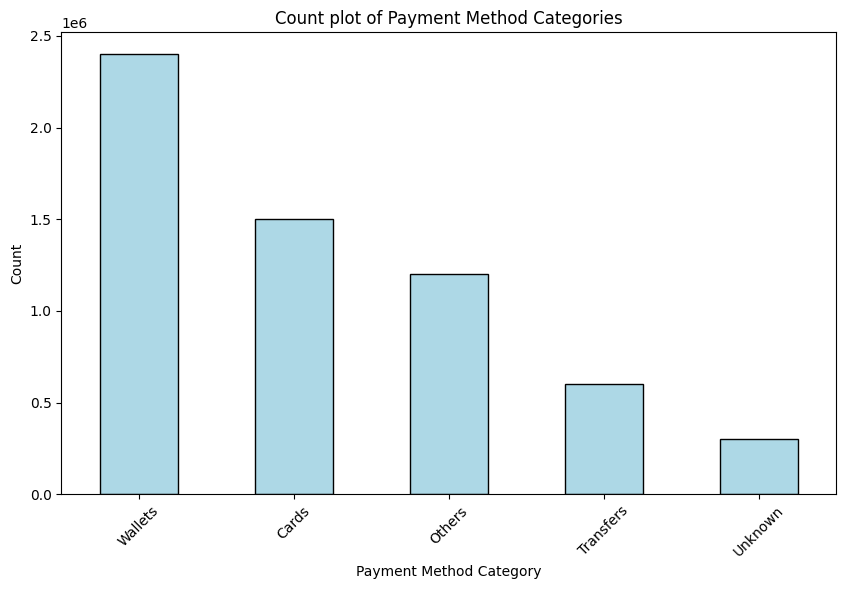

In [15]:
# plot a count plot for the payment methods

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['Payment Method Category'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Count plot of Payment Method Categories')
plt.xlabel('Payment Method Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




### Transaction Type

In [16]:
# feature engineering for transaction type column

# create a dictionary to map transaction types to categories
transaction_type_categories = {
    'Payment': ['Payment', 'Charity', 'Contribution', 'Membership', 'Invoice', 'Admission'],
    'Transfer': ['Transfer', 'Interest', 'Royalty', 'Rent', 'Payout', 'Reimbursement', 'Gift'],
    'Fee': ['Registration Fee', 'Recharge', 'Compensation', 'Subscription', 'Tax', 'Fine', 'Rental', 'Reward'],
    'Financial': ['Loan', 'Auction', 'Bonus', 'Expense', 'Settlement', 'Cashback', 'Investment', 'Acquisition', 'Deposit', 'Service Charge', 'Dividend', 'Buyback', 'Withdrawal', 'Purchase'],
    'Scholarship & Donation': ['Scholarship', 'Donation', 'Refund']
}

# function to categorize transaction types
def categorize_transaction_type(transaction_type):
    for category, types in transaction_type_categories.items():
        if transaction_type in types:
            return category
    return 'Other'

# apply categorization to the 'Transaction Type' column
df['Transaction Type Category'] = df['Transaction Type'].apply(categorize_transaction_type)

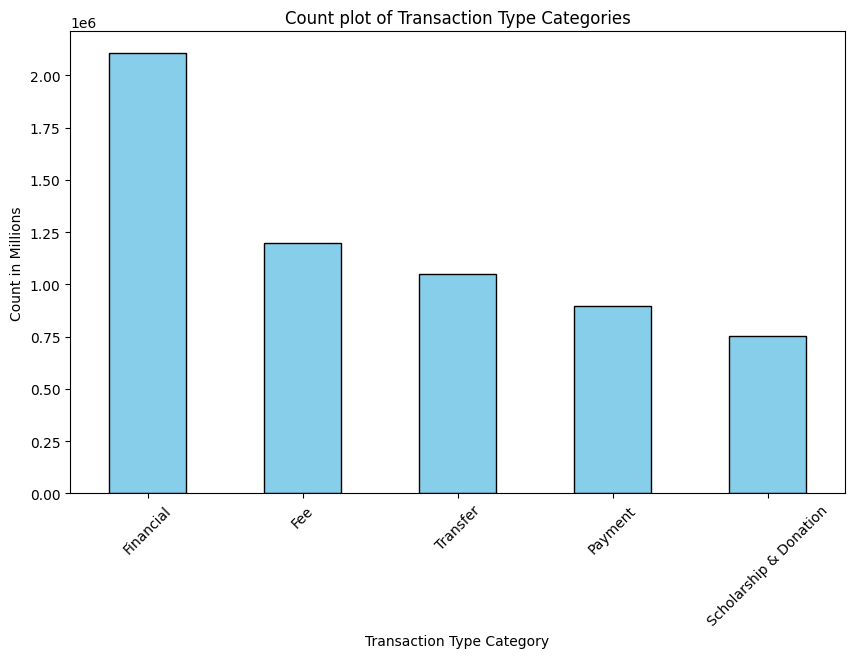

In [17]:
# plot count plot of transaction type categories

plt.figure(figsize=(10, 6))
df['Transaction Type Category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count plot of Transaction Type Categories')
plt.xlabel('Transaction Type Category')
plt.ylabel('Count in Millions')
plt.xticks(rotation=45)
plt.show()

### Device Type

In [18]:
# feature engineering and EDA for device type column

# Create a dictionary to map device types to categories
device_type_categories = {
    'Smart Home Devices': ['Smart Thermostat', 'Smart Lock', 'Smart Mirror', 'Home Security System', 'Home Automation Hub', 'Smart Doorbell', 'Smart Appliance', 'Smart Speaker', 'Smart TV'],
    'Smartphones & Tablets': ['Smartphone', 'Tablet', 'Mobile'],
    'Computing Devices': ['Desktop', 'Laptop', 'Server'],
    'Gaming & Entertainment': ['Gaming Console', 'Augmented Reality Glasses', 'Wearable Device'],
    'Other Electronic Devices': ['Digital Camera', 'Robot', 'Vending Machine', 'Embedded System', 'Virtual Reality Headset', 'Medical Device', 'E-Reader', 'Vehicle Infotainment System', 'Industrial Controller', 'Self-Checkout Kiosk', 'ATM', 'Barcode Scanner', 'GPS Device', 'Drone', 'POS Terminal', 'Kiosk', 'Cash Register', 'IoT Device', 'Fitness Tracker'],
}

# Function to categorize device types
def categorize_device_type(device_type):
    for category, types in device_type_categories.items():
        if device_type in types:
            return category
    return 'Other'

# Apply categorization to the 'Device Type' column
df['Device Type Category'] = df['Device Type'].apply(categorize_device_type)

In [19]:
#

df['Device Type Category'].value_counts()

Other Electronic Devices    3000283
Smart Home Devices          1420597
Gaming & Entertainment       473979
Smartphones & Tablets        473589
Computing Devices            473465
Other                        158087
Name: Device Type Category, dtype: int64

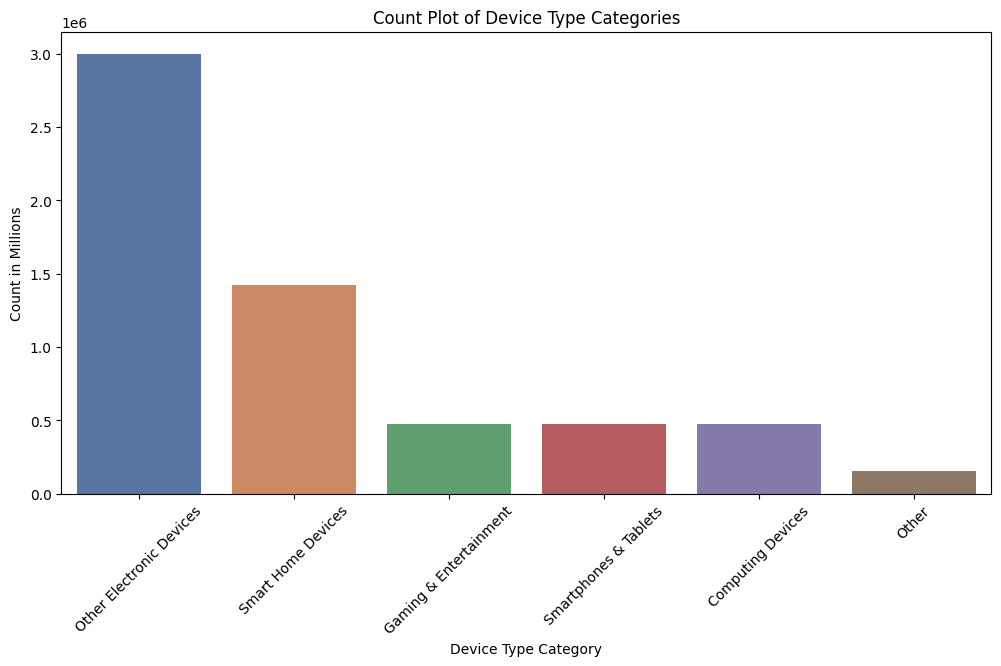

In [20]:
# Create a count plot of device type categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Device Type Category', order=df['Device Type Category'].value_counts().index, palette='deep')
plt.title('Count Plot of Device Type Categories')
plt.xlabel('Device Type Category')
plt.ylabel('Count in Millions')
plt.xticks(rotation=45)
plt.show()



### Browser Type

In [21]:
# create a dictionary to map common browser types to categories
common_browser_types = {
    'Chrome': ['Chrome'],
    'Firefox': ['Firefox'],
    'Safari': ['Safari'],
    'Edge': ['Edge', 'Microsoft Edge'],
    'Internet Explorer': ['Internet Explorer', 'IE'],
    'Opera': ['Opera'],
    'Other': ['Maxthon', 'Tor Browser', 'SRWare Iron', 'W3M', 'Browsh', 'Silk', 'Dooble', 'Beaker', 'Min', 'Surfraw', 'ELinks', 'Avant Browser', 'Vimb', 'Epiphany', 'SeaMonkey', 'Vivaldi', 'Samsung Internet', 'Falkon', 'Basilisk', 'Lynx', 'Surf', 'NetSurf', 'UC Browser', 'Chromium', 'Brave', 'Waterfox', 'Links', 'Pale Moon', 'Konqueror', 'Midori', 'Otter Browser', 'Slimjet', 'Qutebrowser']
}

# function to categorize browser types
def categorize_browser_type(browser_type):
    for category, types in common_browser_types.items():
        if any(browser in browser_type for browser in types):
            return category
    return 'Other'

# apply categorization to the 'Browser Type' column
df['Browser Type Category'] = df['Browser Type'].apply(categorize_browser_type)

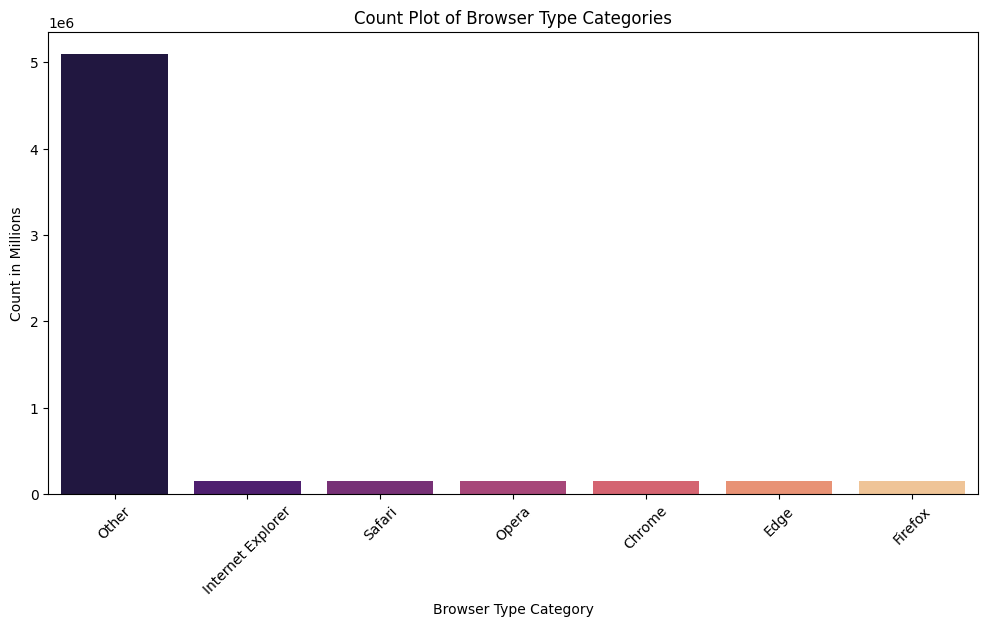

In [22]:
# create a count plot of browser type categories
plt.figure(figsize=(12, 6))
palette = 'magma'
sns.countplot(data=df, x='Browser Type Category', order=df['Browser Type Category'].value_counts().index, palette=palette)
plt.title('Count Plot of Browser Type Categories')
plt.xlabel('Browser Type Category')
plt.ylabel('Count in Millions')
plt.xticks(rotation=45)
plt.show()

In [23]:
#
df['Browser Type Category'].value_counts()

Other                5099942
Internet Explorer     150437
Safari                150308
Opera                 150149
Chrome                150037
Edge                  149564
Firefox               149563
Name: Browser Type Category, dtype: int64

### OS Type

In [24]:
# Create a dictionary to map common operating systems to categories
common_os_types = {
    'Linux-based': ['Linux', 'Arch Linux', 'Gentoo', 'Unix', 'Red Hat Enterprise Linux', 'CentOS', 'Firefox OS', 'Tizen', 'Raspbian', 'openSUSE', 'Sailfish OS', 'Debian', 'Chrome OS'],
    'Windows-based': ['Windows CE', 'Windows Mobile', 'Windows Server', 'Windows'],
    'macOS-based': ['macOS Server', 'macOS', 'Mac OS X'],
    'Mobile OS': ['tvOS', 'Android TV', 'iOS', 'KaiOS', 'watchOS', 'Android', 'Android Wear'],
    'Other OS': ['Solaris', 'Fedora', 'MeeGo', 'Palm OS', 'Symbian', 'BlackBerry', 'HarmonyOS', 'HP-UX', 'QNX', 'AIX', 'FreeBSD'],
}

# Function to categorize operating systems
def categorize_os_type(os_type):
    for category, types in common_os_types.items():
        if any(os in os_type for os in types):
            return category
    return 'Other'


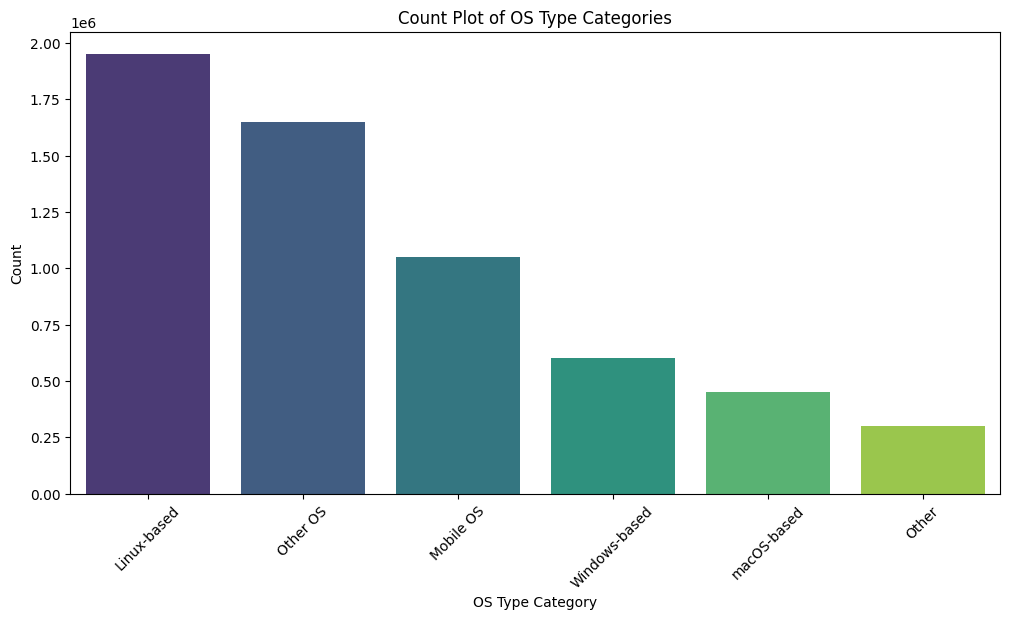

In [25]:
# Apply categorization to the 'Operating System' column
df['OS Type Category'] = df['Operating System'].apply(categorize_os_type)

# Create a count plot of operating system categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='OS Type Category', order=df['OS Type Category'].value_counts().index, palette='viridis')
plt.title('Count Plot of OS Type Categories')
plt.xlabel('OS Type Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Merchant Category

In [26]:
# create a dictionary to map common merchant categories to categories
common_merchant_categories = {
    'Retail': ['Sporting Goods', 'Clothing', 'Appliances', 'Art & Collectibles', 'Electronics Repair', 'Furniture', 'Office Supplies', 'Automotive',
               'Fitness & Nutrition', 'Health & Wellness', 'Gifts & Souvenirs', 'Luxury Brands', 'Pets & Animals', 'Toys & Games', 'Jewelry', 'Home Improvement', 'Electronics'],
    'Online Marketplace': ['Online Marketplace'],
    'Antiques & Collectibles': ['Vintage & Antique'],
    'Music & Instruments': ['Music & Instruments'],
    'Maternity & Baby': ['Baby & Maternity'],
    'Beauty & Cosmetics': ['Beauty & Cosmetics'],
    'Industrial & Scientific': ['Industrial & Scientific'],
    'Specialty Services': ['Specialty Services'],
    'Wholesale': ['Wholesale'],
    'Financial Services': ['Financial Services'],
    'Food & Beverage': ['Food & Beverage'],
    'Travel & Tourism': ['Travel & Tourism'],
    'Sports & Outdoors': ['Sports & Outdoors'],
    'Home & Garden': ['Home & Garden'],
    'Technology': ['Technology'],
    'Hobby & Crafts': ['Hobby & Crafts'],
    'Wedding & Bridal': ['Wedding & Bridal'],
    'Farm & Agriculture': ['Farm & Agriculture'],
    'Real Estate': ['Real Estate'],
    'Charity & Nonprofit': ['Charity & Nonprofit'],
    'Education': ['Education'],
    'Books & Literature': ['Books & Literature'],
    'Entertainment': ['Entertainment'],
    'Subscription Services': ['Subscription Services']
}

# function to categorize merchant categories
def categorize_merchant_category(merchant_category):
    for category, categories in common_merchant_categories.items():
        if merchant_category in categories:
            return category
    return 'Other'

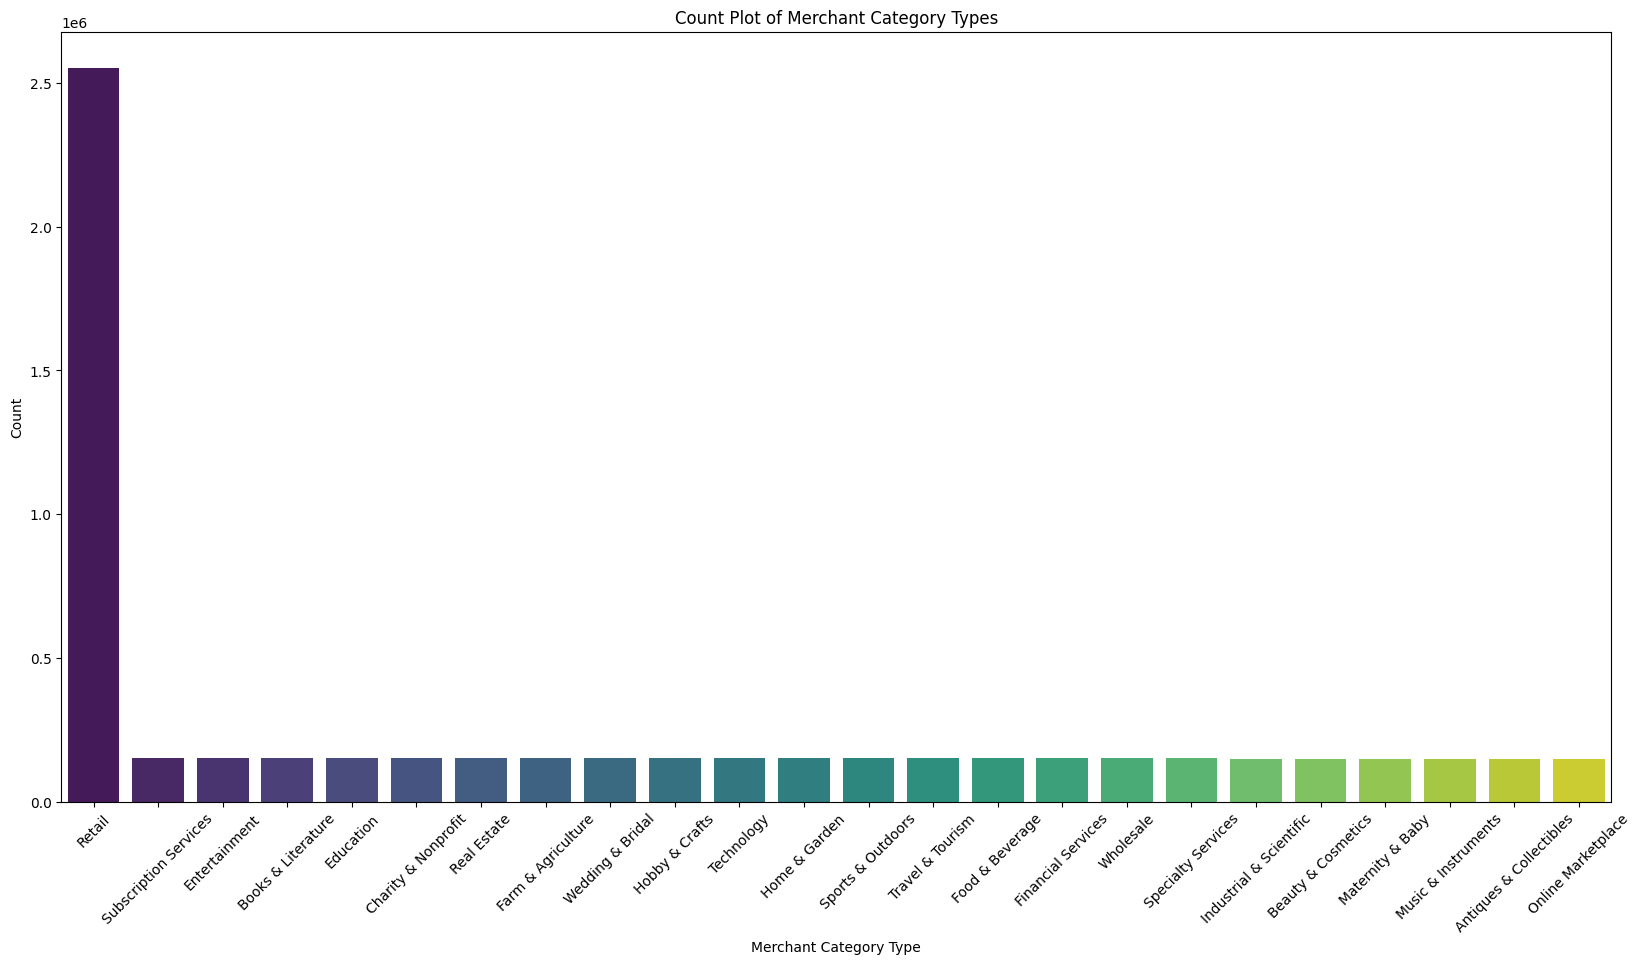

In [27]:
# apply categorization to the 'Merchant Category' column
df['Merchant Category Type'] = df['Merchant Category'].apply(categorize_merchant_category)

# Create a count plot of merchant category types
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='Merchant Category Type', order=df['Merchant Category Type'].value_counts().index, palette='viridis')
plt.title('Count Plot of Merchant Category Types')
plt.xlabel('Merchant Category Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [28]:
# merchant category types

df['Merchant Category Type'].value_counts()

Retail                     2551610
Subscription Services       150594
Entertainment               150517
Books & Literature          150483
Education                   150458
Charity & Nonprofit         150434
Real Estate                 150374
Farm & Agriculture          150257
Wedding & Bridal            150142
Hobby & Crafts              149911
Technology                  149884
Home & Garden               149877
Sports & Outdoors           149860
Travel & Tourism            149858
Food & Beverage             149807
Financial Services          149776
Wholesale                   149693
Specialty Services          149666
Industrial & Scientific     149629
Beauty & Cosmetics          149627
Maternity & Baby            149508
Music & Instruments         149392
Antiques & Collectibles     149348
Online Marketplace          149295
Name: Merchant Category Type, dtype: int64

### User Gender

In [29]:
# distribution of User Gender

df['User Gender'].value_counts()


Male                 858298
Non-Binary           858060
Prefer Not to Say    857184
Female               856905
Genderqueer          856848
Other                856554
Agender              856151
Name: User Gender, dtype: int64

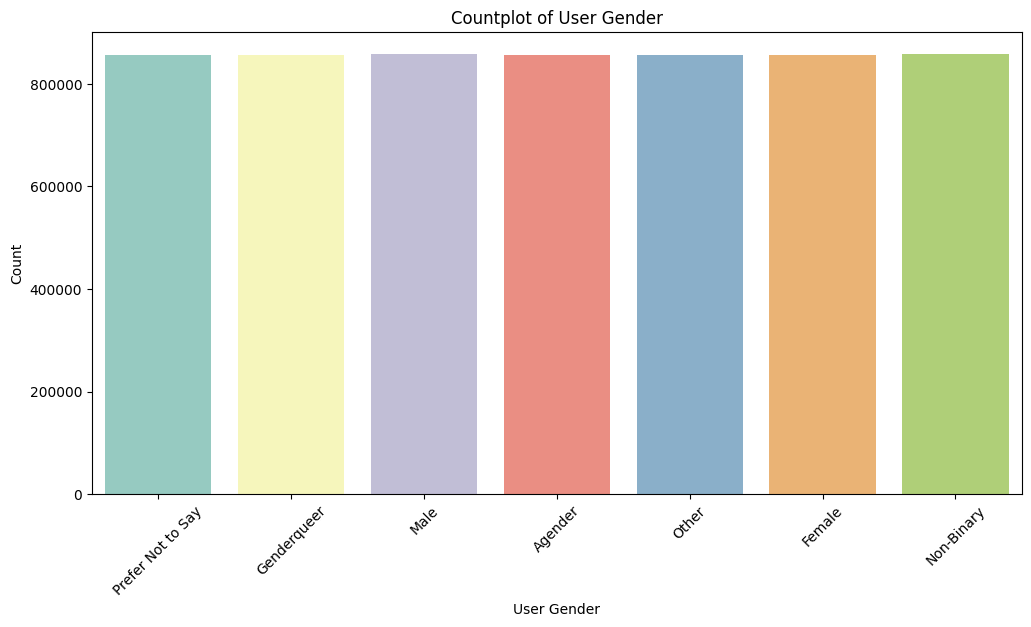

In [30]:
# countplot of user gender

plt.figure(figsize=(12,6))
sns.countplot(x='User Gender', data=df, palette='Set3')
plt.title('Countplot of User Gender', fontsize=12)
plt.xlabel('User Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### User Account Status

In [31]:
# create a dictionary to map common user account status categories
common_user_account_status = {
    'Active Status': ['Pro', 'Member', 'Premium', 'VIP', 'Existing', 'Active', 'Standard', 'Verified', 'Trial'],
    'Inactive Status': ['Closed', 'Free', 'Inactive', 'Unverified', 'Guest', 'New', 'Suspended', 'Limited'],
    'Pending Status': ['Pending Approval']
}

# function to categorize user account statuses
def categorize_user_account_status(account_status):
    for category, statuses in common_user_account_status.items():
        if account_status in statuses:
            return category
    return 'Other'

# apply categorization to the 'User Account Status' column
df['User Account Status Category'] = df['User Account Status'].apply(categorize_user_account_status)

In [32]:
#

df['User Account Status Category'].value_counts()

Active Status      3000556
Inactive Status    2665612
Pending Status      333832
Name: User Account Status Category, dtype: int64

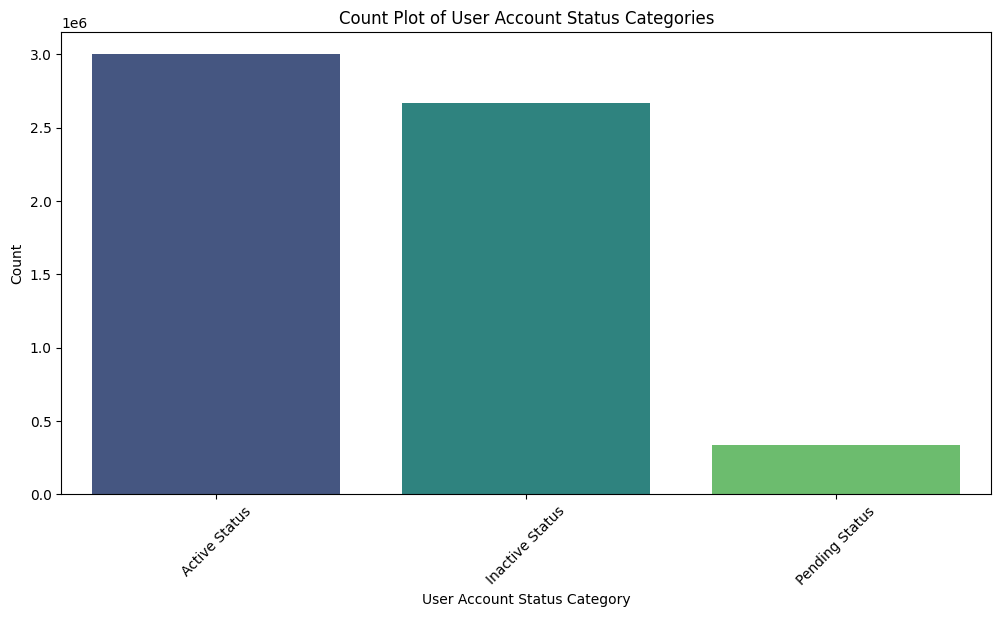

In [33]:

# create a count plot of user account status categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='User Account Status Category', order=df['User Account Status Category'].value_counts().index, palette='viridis')
plt.title('Count Plot of User Account Status Categories')
plt.xlabel('User Account Status Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Transaction Status

In [34]:
# create a dictionary to map common transaction status categories
common_transaction_statuses = {
    'Completed Status': ['Resolved', 'Credited', 'Completed', 'Executed', 'Delivered', 'Settled', 'Approved', 'Cleared', 'Posted', 'Received', 'Transferred', 'Sent'],
    'Pending Status': ['Awaiting Verification', 'Pending', 'Pending Payment', 'Pending Review', 'In Transit', 'Processed', 'Processing', 'Blocked', 'Pending Confirmation', 'In Progress'],
    'Rejected Status': ['Unverified', 'Held for Security', 'Partially Approved', 'Rejected', 'Error', 'Failed', 'Declined', 'Cancelled', 'Under Review', 'Hold', 'Partially Declined', 'Disputed', 'Debit', 'Void'],
}

# function to categorize transaction statuses
def categorize_transaction_status(transaction_status):
    for category, statuses in common_transaction_statuses.items():
        if transaction_status in statuses:
            return category
    return 'Other'

# apply categorization to the 'Transaction Status' column
df['Transaction Status Category'] = df['Transaction Status'].apply(categorize_transaction_status)

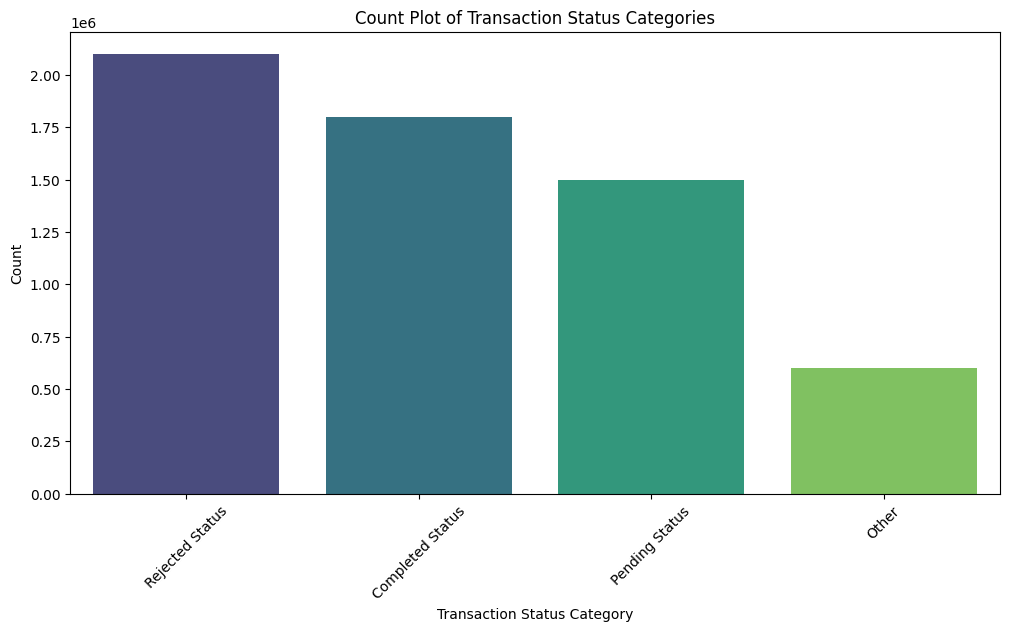

In [35]:

# create a count plot of transaction status categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Transaction Status Category', order=df['Transaction Status Category'].value_counts().index, palette='viridis')
plt.title('Count Plot of Transaction Status Categories')
plt.xlabel('Transaction Status Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [36]:
df[df['Transaction Status'].isin(['Debit'])].shape

(150425, 40)

In [37]:
df[df['Transaction Status'].isin(['Debit'])].head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,Transaction Authentication Method,Fraudulent Flag,Payment Method Category,Transaction Type Category,Device Type Category,Browser Type Category,OS Type Category,Merchant Category Type,User Account Status Category,Transaction Status Category
19,82773548,7724,830.55,2022-04-06 18:02:29,2560,Klarna,IND,Rent,Barcode Scanner,85.93.200.148,...,Security Question,0,Cards,Transfer,Other Electronic Devices,Other,Mobile OS,Retail,Active Status,Rejected Status
145,60802707,5407,913.17,2021-10-23 11:53:24,7345,Wire Transfer,ZAF,Reward,Embedded System,35.162.177.125,...,Biometric Card,0,Transfers,Fee,Other Electronic Devices,Other,Linux-based,Retail,Inactive Status,Rejected Status
161,58122320,5363,784.86,2022-07-17 08:34:04,1664,Apple Pay,AUS,Acquisition,Tablet,29.92.131.93,...,Palm Vein Scan,1,Wallets,Financial,Smartphones & Tablets,Other,Other OS,Antiques & Collectibles,Inactive Status,Rejected Status
214,73964704,4600,400.35,2021-05-23 11:18:15,1677,Direct Debit,JPN,Recharge,Fitness Tracker,128.71.81.104,...,Email Verification,1,Cards,Fee,Other Electronic Devices,Other,Other OS,Industrial & Scientific,Inactive Status,Rejected Status
268,39528368,6356,726.08,2023-05-28 22:54:07,6171,American Express,CAN,Membership,Smart Speaker,134.215.91.233,...,Security Question,1,Unknown,Payment,Smart Home Devices,Safari,Mobile OS,Financial Services,Inactive Status,Rejected Status


### Transaction Currency

In [38]:
# define a function to categorize currency types
def categorize_currency(currency_code):
    if currency_code in ['USD', 'EUR', 'GBP']:
        return 'Major Currency'
    elif currency_code in ['JPY', 'CNY', 'KRW']:
        return 'Asian Currency'
    elif currency_code in ['BRL', 'ARS']:
        return 'South American Currency'
    elif currency_code in ['AUD', 'NZD']:
        return 'Australian/NZ Dollar'
    else:
        return 'Other Currency'

# Apply categorization to create a new column
df['Currency Type'] = df['Transaction Currency'].apply(categorize_currency)
df['Currency Type'].value_counts()

Other Currency             4501185
Major Currency              449950
Asian Currency              449439
Australian/NZ Dollar        300067
South American Currency     299359
Name: Currency Type, dtype: int64

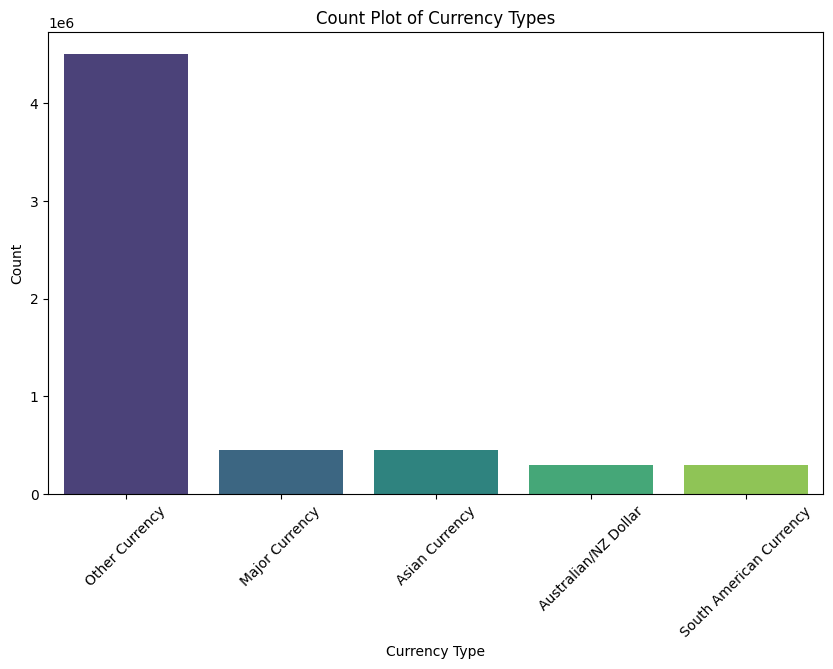

In [39]:
# Create a count plot of currency types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Currency Type', order=df['Currency Type'].value_counts().index, palette='viridis')
plt.title('Count Plot of Currency Types')
plt.xlabel('Currency Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Transaction Purpose

In [40]:
# Define a function to categorize transaction purposes
def categorize_transaction_purpose(purpose):
    if 'Purchase' in purpose:
        return 'Purchase'
    elif 'Payment' in purpose:
        return 'Payment'
    elif 'Transfer' in purpose:
        return 'Transfer'
    elif 'Donation' in purpose:
        return 'Donation'
    else:
        return 'Other'

# Apply categorization to create a new column
df['Transaction Purpose Category'] = df['Transaction Purpose'].apply(categorize_transaction_purpose)

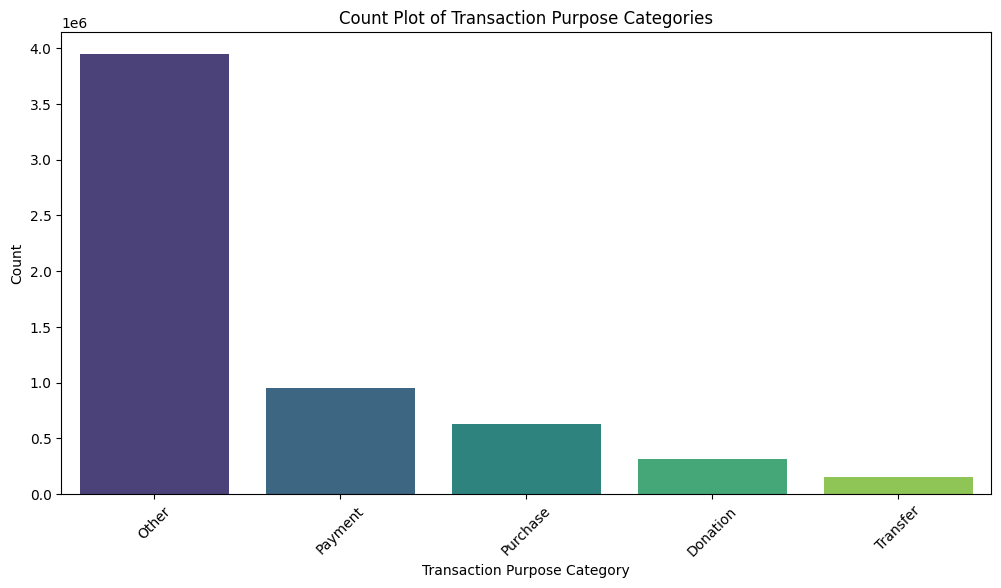

In [41]:
# Create a count plot of transaction purpose categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Transaction Purpose Category', order=df['Transaction Purpose Category'].value_counts().index, palette='viridis')
plt.title('Count Plot of Transaction Purpose Categories')
plt.xlabel('Transaction Purpose Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [42]:
df['Transaction Purpose Category'].value_counts()

Other       3946623
Payment      947339
Purchase     632203
Donation     316453
Transfer     157382
Name: Transaction Purpose Category, dtype: int64

In [43]:
df[df['Transaction Purpose'].str.contains(
    'Payment'
    )]['Transaction Purpose'
        ].value_counts()

Invoice Payment     158411
Interest Payment    158117
Bill Payment        158079
Rental Payment      157999
Utility Payment     157730
Tax Payment         157003
Name: Transaction Purpose, dtype: int64

## User's Email Domain

In [44]:
# extract the top-level domain (TLD) from email domains
df["Email Domain TLD"] = df["User's Email Domain"].str.split('.').str[-1]

# Define a function to categorize TLDs
def categorize_email_domain_tld(tld):
    if tld in ['com', 'co.uk', 'net']:
        return tld
    else:
        return 'Other'

# apply categorization to create a new column
df['Email Domain TLD Category'] = df["Email Domain TLD"].apply(categorize_email_domain_tld)

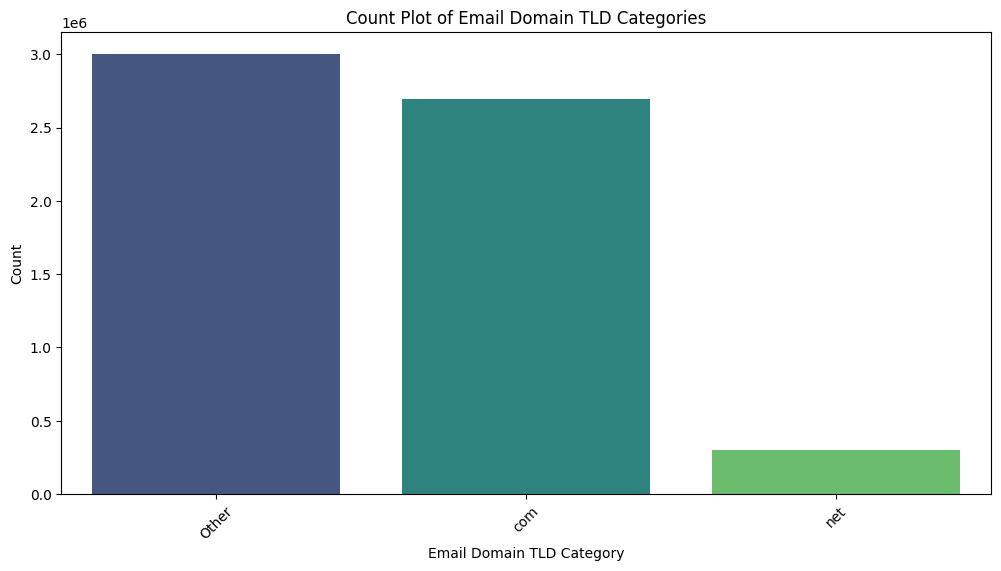

In [45]:
# create a count plot of email domain TLD categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Email Domain TLD Category', order=df['Email Domain TLD Category'].value_counts().index, palette='viridis')
plt.title("Count Plot of Email Domain TLD Categories")
plt.xlabel("Email Domain TLD Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Transaction Authentication Method

In [46]:
# Define a function to categorize authentication methods
def categorize_authentication_method(method):
    if 'Biometric' in method:
        return 'Biometric'
    elif 'Authentication' in method:
        return 'Authentication App'
    elif 'Token' in method:
        return 'Token'
    elif 'Pattern' in method:
        return 'Pattern Lock'
    elif 'Smart Card' in method:
        return 'Smart Card'
    elif 'Code' in method:
        return 'Code'
    else:
        return 'Other'

# Apply categorization to create a new column
df['Authentication Method Category'] = df['Transaction Authentication Method'].apply(categorize_authentication_method)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Authentication App'),
  Text(2, 0, 'Biometric'),
  Text(3, 0, 'Code'),
  Text(4, 0, 'Token'),
  Text(5, 0, 'Smart Card'),
  Text(6, 0, 'Pattern Lock')])

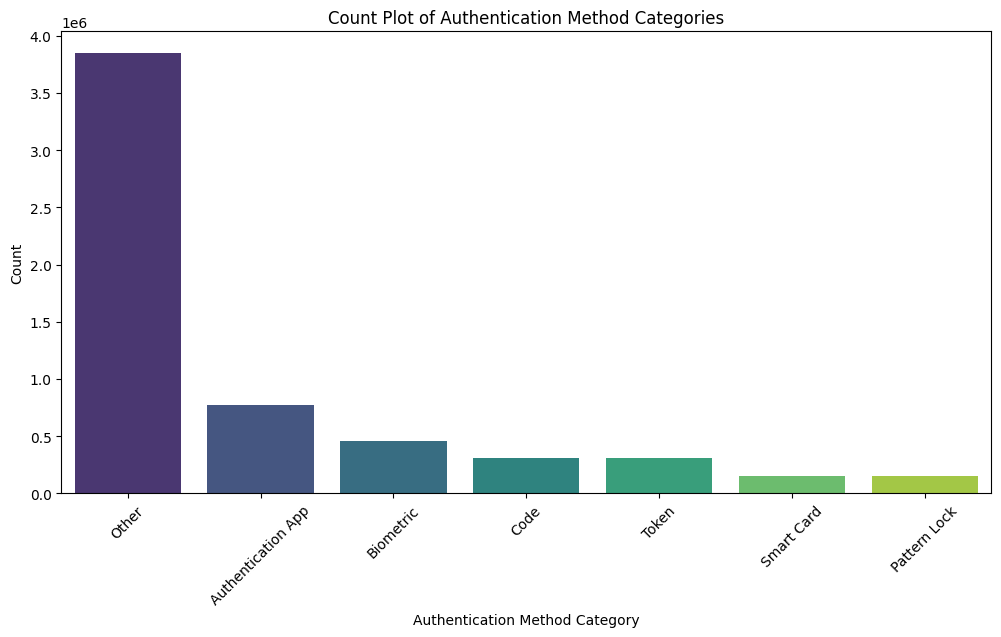

In [47]:
# Create a count plot of authentication method categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Authentication Method Category', order=df['Authentication Method Category'].value_counts().index, palette='viridis')
plt.title('Count Plot of Authentication Method Categories')
plt.xlabel('Authentication Method Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Univariate Analysis for Numerical Variables

In [48]:
num_cols

['Transaction Amount',
 'User Age',
 "User's Transaction History",
 "User's Credit Score",
 'Location Distance',
 'Time Taken for Transaction',
 "Merchant's Reputation Score",
 "Merchant's Business Age"]

In [49]:
df[num_cols].head()

,Transaction Amount,User Age,User's Transaction History,User's Credit Score,Location Distance,Time Taken for Transaction,Merchant's Reputation Score,Merchant's Business Age
0,163.08,68,26,343,9.34,24.22,2.71,3
1,430.74,22,60,688,65.28,55.11,3.95,13
2,415.74,71,81,371,44.05,53.84,3.81,7
3,565.89,78,18,687,21.70,21.62,2.67,15
4,955.49,31,98,605,56.63,53.71,3.19,17


In [50]:
# txn = ['Transaction Amount']

# # Loop through each numerical column and create plots
# for col in txn:
#       plt.figure(figsize=(10, 5))

#       # Histogram
#       plt.subplot(2, 2, 1)
#       sns.histplot(data=df, x=col, bins=30, kde=True, color='skyblue')
#       plt.title(f'Histogram of {col}')

#       # Box Plot
#       plt.subplot(2, 2, 2)
#       sns.boxplot(data=df, y=col, color='lightcoral')
#       plt.title(f'Box Plot of {col}')

#       # Kernel Density Plot
#       plt.subplot(2, 2, 3)
#       sns.kdeplot(data=df, x=col, color='salmon', fill=True)
#       plt.title(f'Kernel Density Plot of {col}')

#       # ECDF Plot
#       plt.subplot(2, 2, 4)
#       sns.ecdfplot(data=df, x=col, color='mediumseagreen')
#       plt.title(f'ECDF Plot of {col}')


#       plt.tight_layout()
#       plt.show()

In [51]:
df.columns

Index(['Transaction ID', 'User ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant ID', 'Payment Method',
       'Country Code', 'Transaction Type', 'Device Type', 'IP Address',
       'Browser Type', 'Operating System', 'Merchant Category', 'User Age',
       'User Occupation', 'User Income', 'User Gender', 'User Account Status',
       'Transaction Status', 'Location Distance', 'Time Taken for Transaction',
       'Transaction Time of Day', 'User's Transaction History',
       'Merchant's Reputation Score', 'User's Device Location',
       'Transaction Currency', 'Transaction Purpose', 'User's Credit Score',
       'User's Email Domain', 'Merchant's Business Age',
       'Transaction Authentication Method', 'Fraudulent Flag',
       'Payment Method Category', 'Transaction Type Category',
       'Device Type Category', 'Browser Type Category', 'OS Type Category',
       'Merchant Category Type', 'User Account Status Category',
       'Transaction Status Category',

In [52]:
df["User's Credit Score"]

0          343
1          688
2          371
3          687
4          605
          ... 
5999995    679
5999996    706
5999997    310
5999998    460
5999999    340
Name: User's Credit Score, Length: 6000000, dtype: int64

<ipython-input-53-086a74f3cdd3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


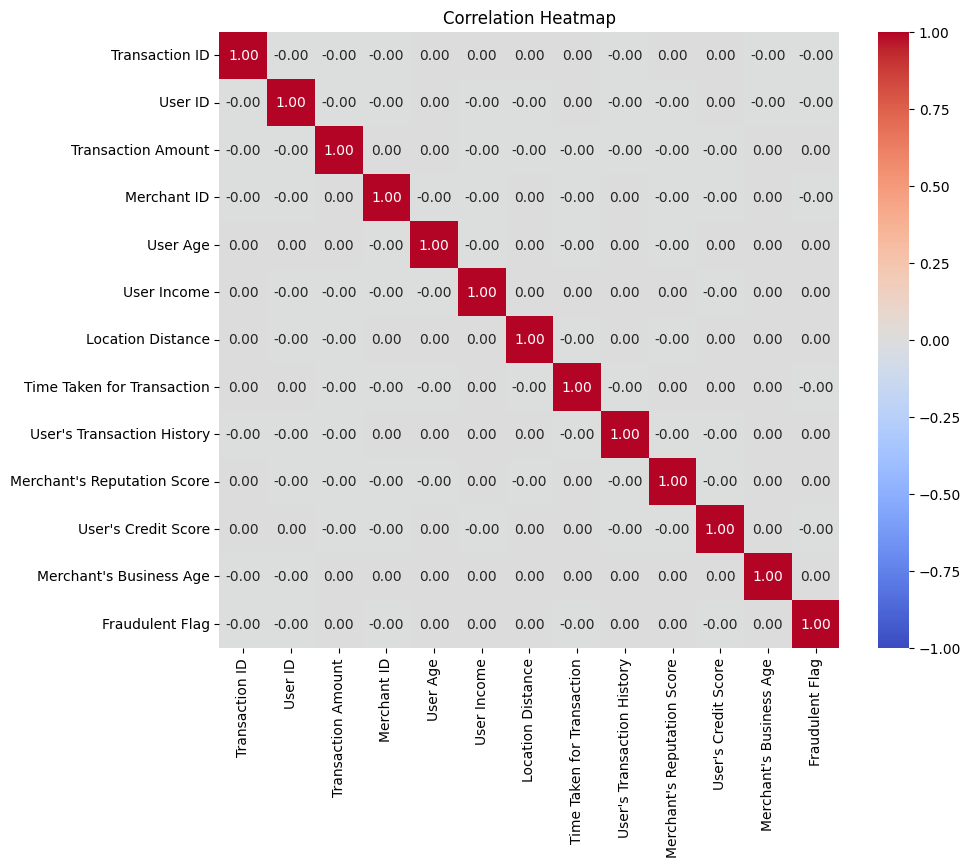

In [53]:
# calculate the correlation matrix
corr_matrix = df.corr()

# create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# add a title
plt.title('Correlation Heatmap')

plt.show()


# Drop Columns and move to Pyspark Dataframe

In [55]:
# view dataframe before moving to pyspark

df.columns

Index(['Transaction ID', 'User ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant ID', 'Payment Method',
       'Country Code', 'Transaction Type', 'Device Type', 'IP Address',
       'Browser Type', 'Operating System', 'Merchant Category', 'User Age',
       'User Occupation', 'User Income', 'User Gender', 'User Account Status',
       'Transaction Status', 'Location Distance', 'Time Taken for Transaction',
       'Transaction Time of Day', 'User's Transaction History',
       'Merchant's Reputation Score', 'User's Device Location',
       'Transaction Currency', 'Transaction Purpose', 'User's Credit Score',
       'User's Email Domain', 'Merchant's Business Age',
       'Transaction Authentication Method', 'Fraudulent Flag',
       'Payment Method Category', 'Transaction Type Category',
       'Device Type Category', 'Browser Type Category', 'OS Type Category',
       'Merchant Category Type', 'User Account Status Category',
       'Transaction Status Category',

In [56]:
len(df.columns)

45

In [57]:
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,Browser Type Category,OS Type Category,Merchant Category Type,User Account Status Category,Transaction Status Category,Currency Type,Transaction Purpose Category,Email Domain TLD,Email Domain TLD Category,Authentication Method Category
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,...,Other,Linux-based,Industrial & Scientific,Active Status,Pending Status,Other Currency,Other,uk,Other,Authentication App
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,...,Other,Windows-based,Beauty & Cosmetics,Pending Status,Completed Status,Other Currency,Other,com,com,Other
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,...,Opera,Mobile OS,Real Estate,Active Status,Completed Status,Other Currency,Other,com,com,Token
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,...,Other,Linux-based,Retail,Active Status,Other,Other Currency,Other,uk,Other,Other
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,...,Other,Other,Retail,Inactive Status,Other,Other Currency,Other,uk,Other,Other


In [58]:
subset=['Payment Method', 'Transaction Type', 'Device Type', 'Browser Type',
   'Operating System', 'Merchant Category', 'User Account Status', 'Transaction Status',
   'Transaction Currency', 'Transaction Purpose', "User's Email Domain", 'Transaction Authentication Method']

len(subset)

12

In [59]:
# drop columns and move to pyspark df

df = df.drop(subset, axis=1)
len(df.columns)

33

In [54]:
# my colab free GPU keeps crashing

# # move to pyspark

# from pyspark.sql import SparkSession

# # create a Spark session
# spark = SparkSession.builder.appName("PandasToSpark").getOrCreate()

# # reassigning df
# pyspark_df = spark.createDataFrame(df)


In [61]:
df.columns

Index(['Transaction ID', 'User ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant ID', 'Country Code',
       'IP Address', 'User Age', 'User Occupation', 'User Income',
       'User Gender', 'Location Distance', 'Time Taken for Transaction',
       'Transaction Time of Day', 'User's Transaction History',
       'Merchant's Reputation Score', 'User's Device Location',
       'User's Credit Score', 'Merchant's Business Age', 'Fraudulent Flag',
       'Payment Method Category', 'Transaction Type Category',
       'Device Type Category', 'Browser Type Category', 'OS Type Category',
       'Merchant Category Type', 'User Account Status Category',
       'Transaction Status Category', 'Currency Type',
       'Transaction Purpose Category', 'Email Domain TLD',
       'Email Domain TLD Category', 'Authentication Method Category'],
      dtype='object')

# Data splitting, Model training and evaluation

In [ ]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# load dataset
data = df

# define the features and target variable
X = data.drop('Fraudulent Flag', axis=1)
y = data['Fraudulent Flag']

# number of splits for k-fold cross-validation
n_splits = 5

# initialize a KFold object
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# initialize a list to store model performance metrics
accuracy_scores = []

# perform k-fold cross-validation
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # initialize and train the XGBoost model
    model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # calculate accuracy and other performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# calculate the mean accuracy across all folds
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# print the mean accuracy and other performance metrics
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(classification_report(y_test, y_pred))


# Final Report

**Fraud Detection Model Training Report**

1. Introduction
This report provides a detailed overview of the steps taken to train and evaluate a fraud detection model using a dataset provided. The report outlines the processes involved in data preparation, feature engineering, model selection, and the challenges encountered during the model training and evaluation.

2. Data Loading
The process began with loading the dataset, which contains approximately 6 million rows and a variety of features including transaction details, user information, and merchant-related attributes. The target variable for the model is the 'Fraudulent Flag,' which indicates whether a transaction is fraudulent or not.

3. Data Exploration
Exploratory data analysis (EDA) was conducted to gain insights into the dataset. Key findings include the presence of various categorical and numerical features, potential missing values, and class distribution for the target variable.

4. Data Preprocessing
To prepare the data for model training, several preprocessing steps were taken:

Handling missing values: Any missing values were imputed using appropriate techniques, such as mean imputation for numerical features and mode imputation for categorical features.
Encoding categorical features: Categorical features were encoded using techniques like one-hot encoding or label encoding to convert them into a numerical format that machine learning algorithms can understand.
Feature engineering: New features were created based on the existing ones, such as extracting information from date and time features or creating interaction terms.
Splitting the data: The dataset was split into training and testing sets for model training and evaluation purposes.
5. Model Selection
The choice of algorithm for the fraud detection model was a critical decision. XGBoost, a popular gradient boosting algorithm, was selected for its ability to handle imbalanced datasets and provide accurate classification.

6. Model Training
The XGBoost classifier was trained on the preprocessed training data. The model was configured with appropriate hyperparameters to optimize its performance. The training process involved multiple iterations to fine-tune the model.

7. Model Evaluation
The model's performance was evaluated using k-fold cross-validation with a stratified approach. Key evaluation metrics included accuracy, precision, recall, F1-score, and the ROC-AUC curve. The goal was to create a model that could effectively distinguish between fraudulent and non-fraudulent transactions.

8. Challenges Encountered
Several challenges were encountered during the model training and evaluation process:

Resource Constraints: The large dataset with 6 million rows and high-dimensional feature space exceeded the available memory and processing capacity in a free Google Colab session. As a result, the session frequently crashed during data processing and model training.

Time-Consuming: Training machine learning models on a dataset of this size is time-consuming and can take a significant amount of time, which may not be feasible in a free Colab session with time limitations.

Optimization Complexity: Fine-tuning model hyperparameters to achieve the best performance can be computationally intensive, and it is challenging to explore a wide range of hyperparameters within the constraints of a free Colab session.

9. Next Steps
Due to the resource limitations of the free Colab session and the time required for model training and optimization, it was not possible to complete the model training and evaluation process. To continue the project and make predictions on new data, the following steps are recommended:

Use More Resources: Consider using a more powerful computing environment or cloud-based platform with larger memory and faster processing capabilities to handle the large dataset and intensive model training.

Optimize Hyperparameters: Perform an exhaustive search for the best hyperparameters using techniques like grid search or random search to improve model performance.

Feature Selection: Conduct feature selection to identify the most relevant features and reduce dimensionality, which can lead to more efficient model training.

Ensemble Methods: Experiment with ensemble methods such as stacking or boosting to enhance model performance further.

Deployment: Once a satisfactory model is trained, deploy it to a production environment to make real-time predictions on new transactions.

10. Conclusion
The process of training a fraud detection model involves several critical steps, including data preprocessing, feature engineering, model selection, and evaluation. Resource constraints and computational complexity can pose challenges when working with large datasets. To overcome these challenges and continue the project, consider utilizing more robust computing resources and optimization techniques. A well-trained fraud detection model can be a valuable asset in identifying and preventing fraudulent transactions.